In [1]:
"""
Author: Vamsi
Date Created: 12/07/2023
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Selecting the correct files

30-6-23\Flux_TDep_100mK00001.dat


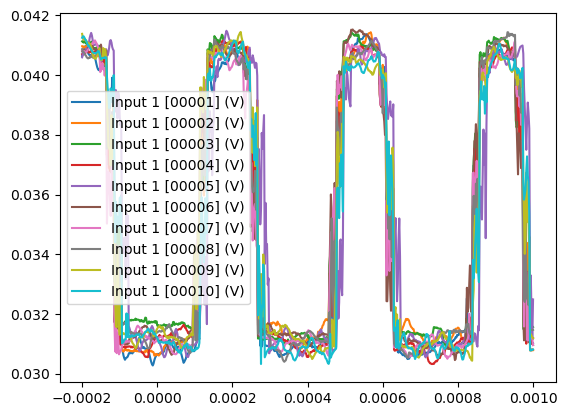

30-6-23\Flux_TDep_110mK00001.dat


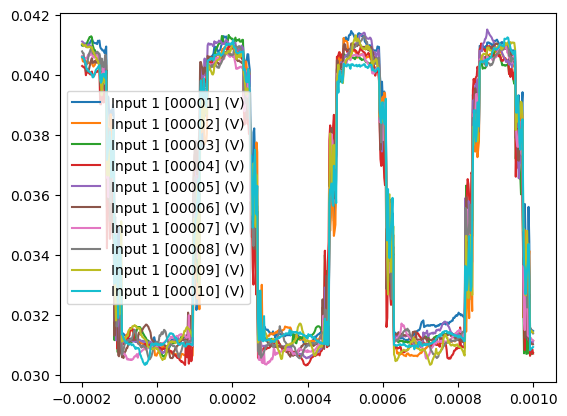

30-6-23\Flux_TDep_11mK00001.dat


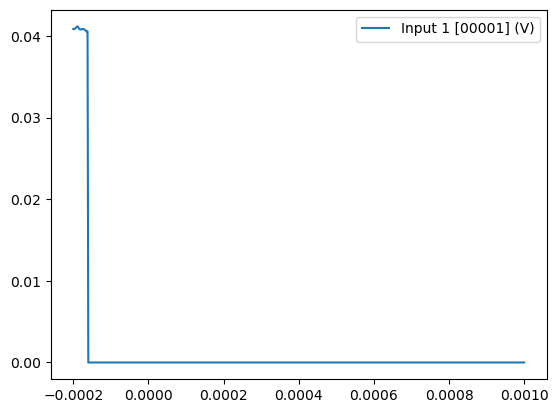

30-6-23\Flux_TDep_11mK_x2000001.dat


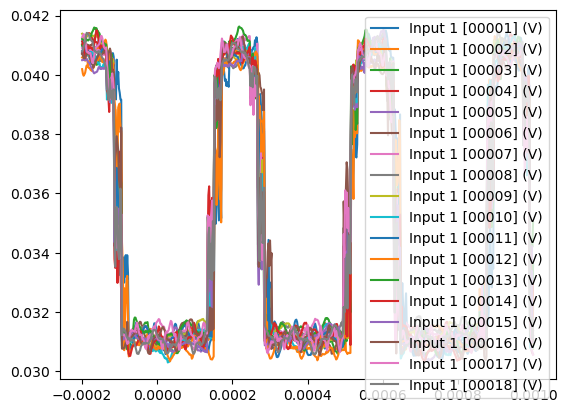

30-6-23\Flux_TDep_120mK00001.dat


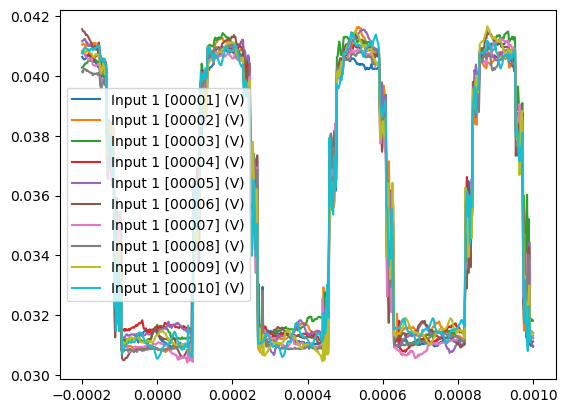

30-6-23\Flux_TDep_130mK00001.dat


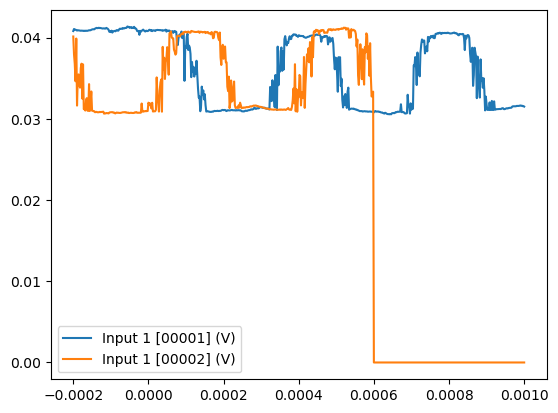

30-6-23\Flux_TDep_130mK_200001.dat


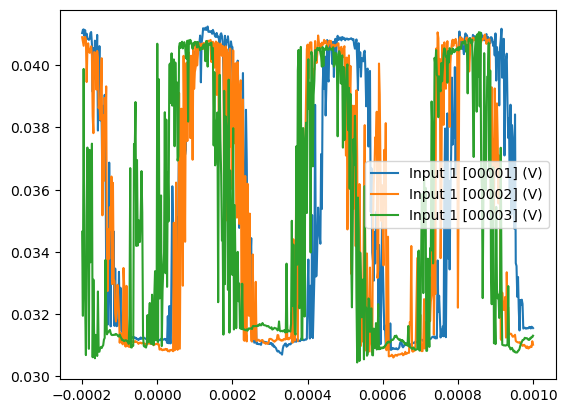

30-6-23\Flux_TDep_130mK_300001.dat


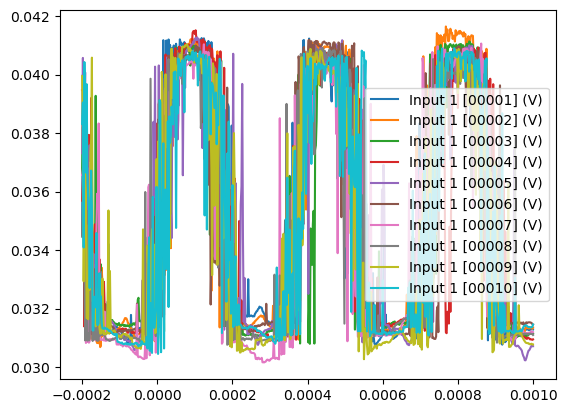

30-6-23\Flux_TDep_140mK00001.dat


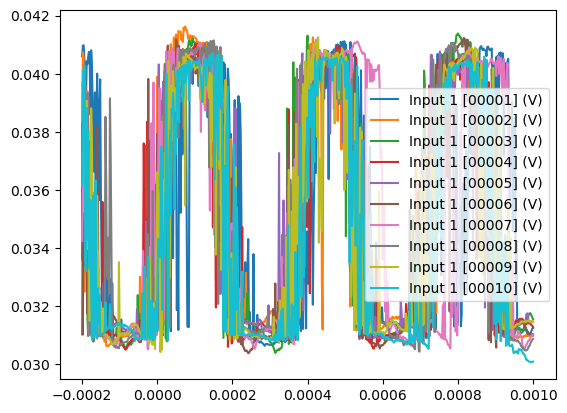

30-6-23\Flux_TDep_140mK_redo00001.dat


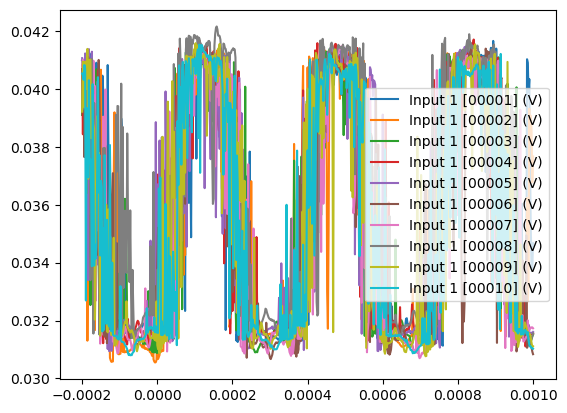

30-6-23\Flux_TDep_150mK00001.dat


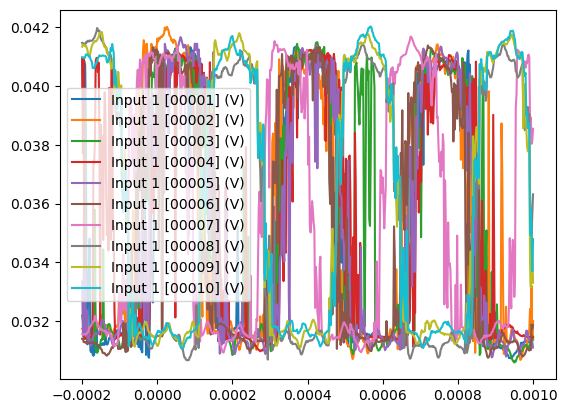

30-6-23\Flux_TDep_150mK_repeat00001.dat


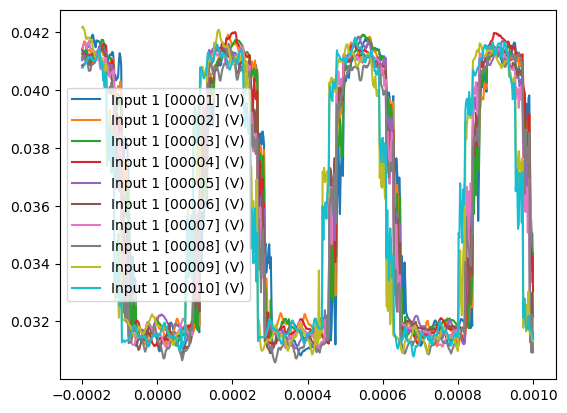

30-6-23\Flux_TDep_16mK00001.dat


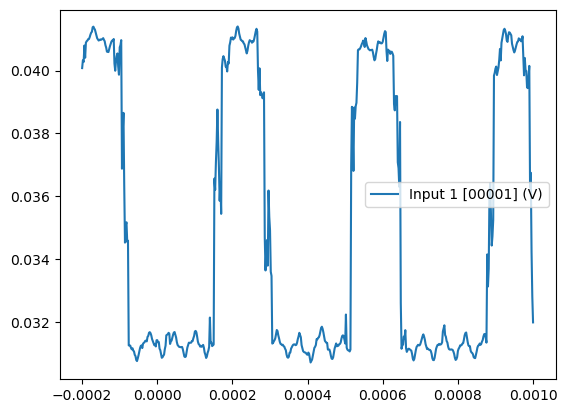

30-6-23\Flux_TDep_170mK00001.dat


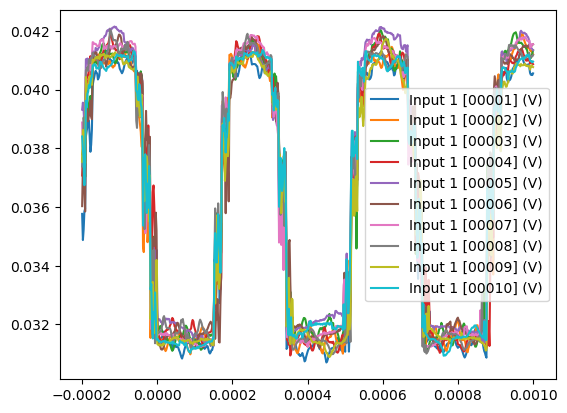

30-6-23\Flux_TDep_200mK00001.dat


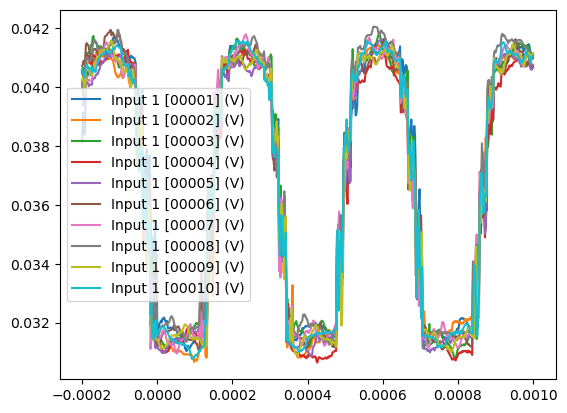

30-6-23\Flux_TDep_20mK_x2000001.dat


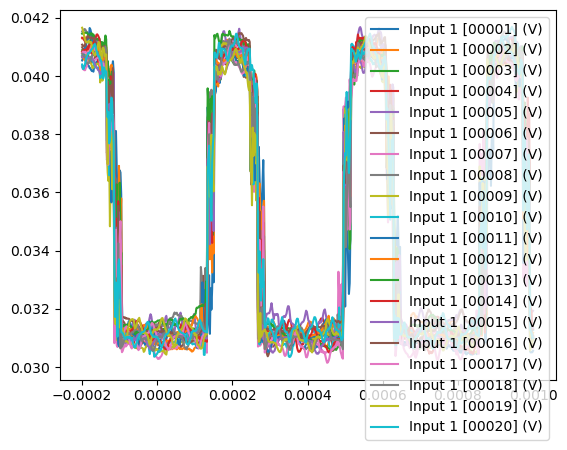

30-6-23\Flux_TDep_250mK00001.dat


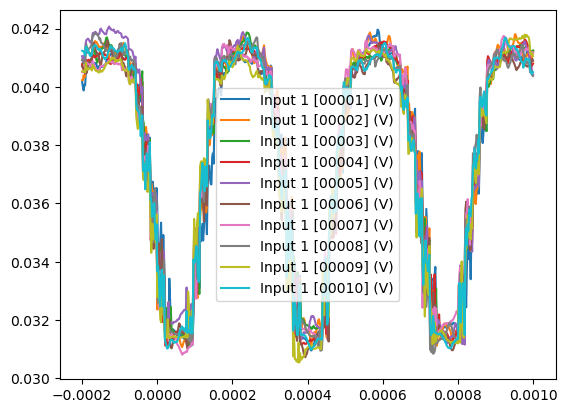

30-6-23\Flux_TDep_300mK00001.dat


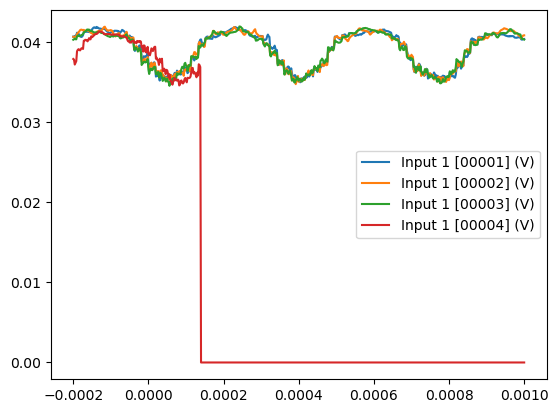

30-6-23\Flux_TDep_300mK_200001.dat


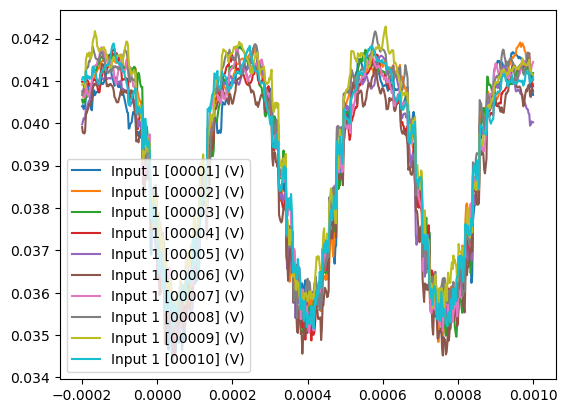

30-6-23\Flux_TDep_30mK_x2000001.dat


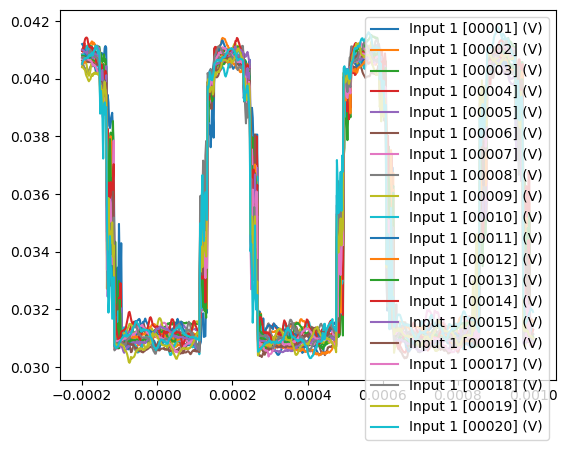

30-6-23\Flux_TDep_350mK00001.dat


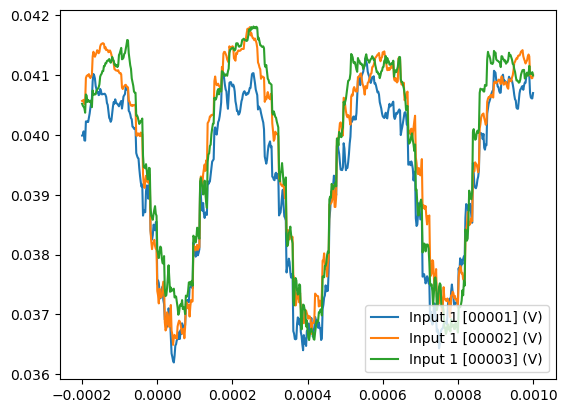

30-6-23\Flux_TDep_350mK_200001.dat


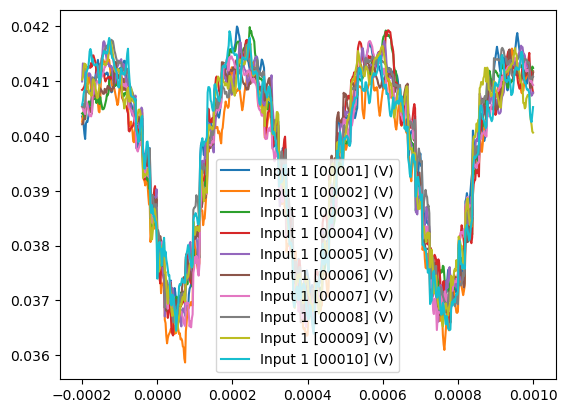

30-6-23\Flux_TDep_400mK00001.dat


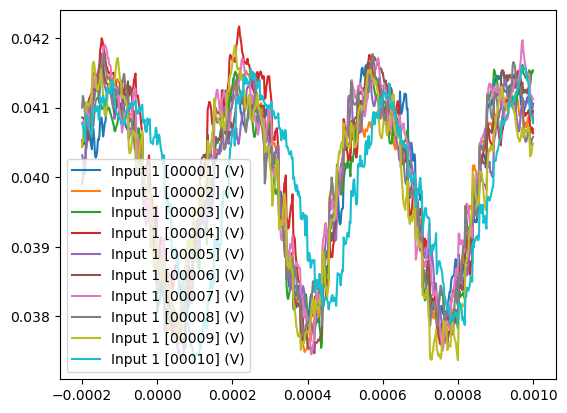

30-6-23\Flux_TDep_400mK_200001.dat


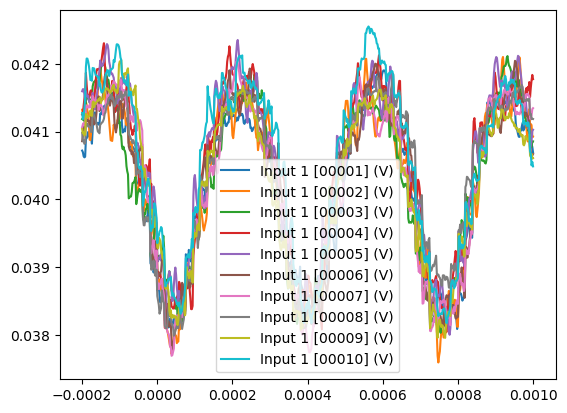

30-6-23\Flux_TDep_40mK00001.dat


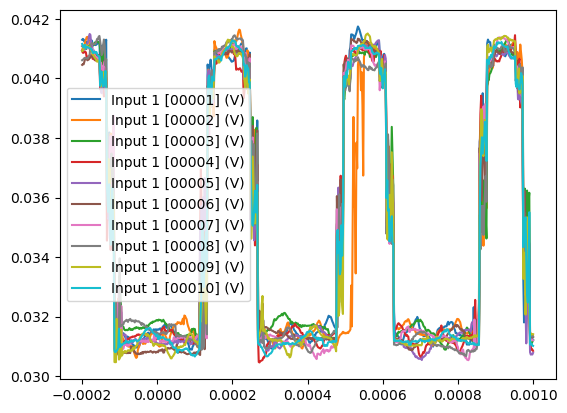

30-6-23\Flux_TDep_40mK_3lobes00001.dat


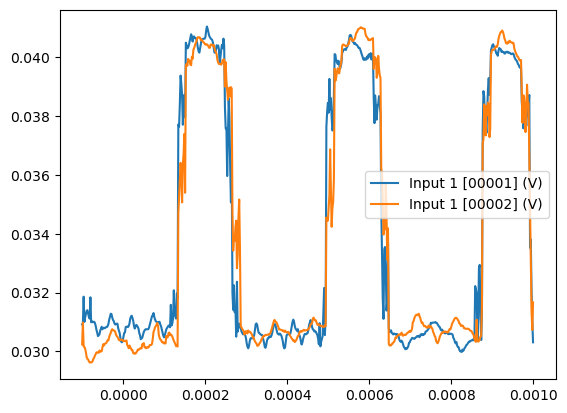

30-6-23\Flux_TDep_40mK_3lobes00002.dat


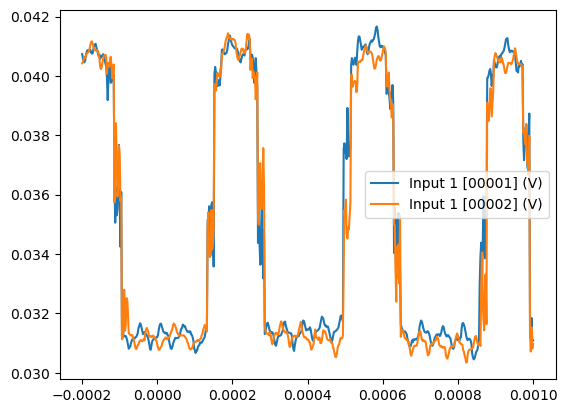

30-6-23\Flux_TDep_40mK_x2000001.dat


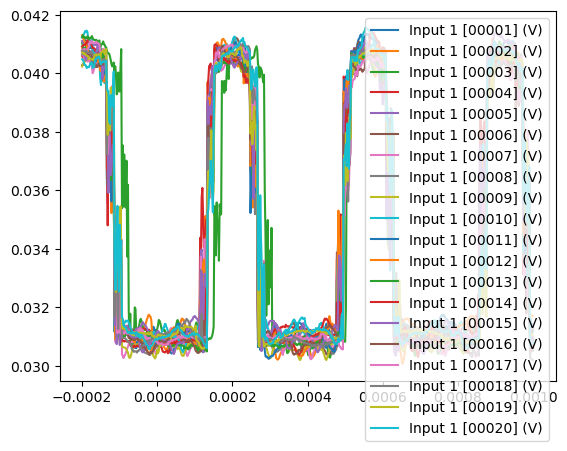

30-6-23\Flux_TDep_50mK00001.dat


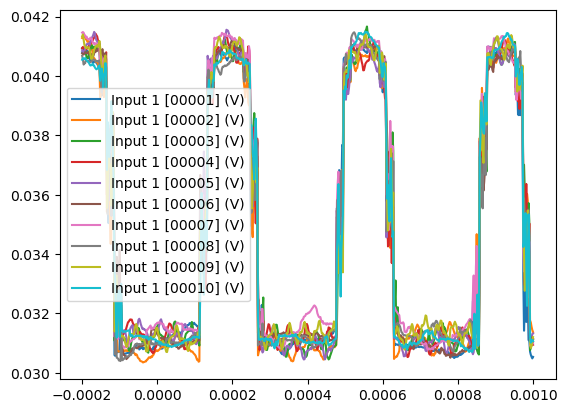

30-6-23\Flux_TDep_50mK_lobes00001.dat


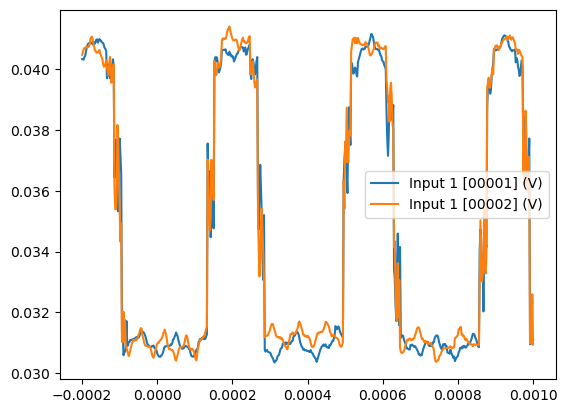

30-6-23\Flux_TDep_50mK_lobes00002.dat


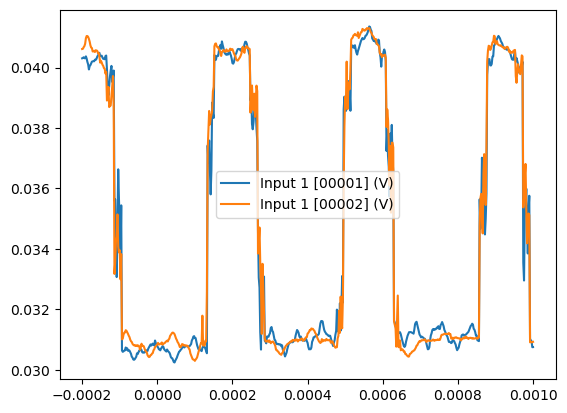

30-6-23\Flux_TDep_60mK00001.dat


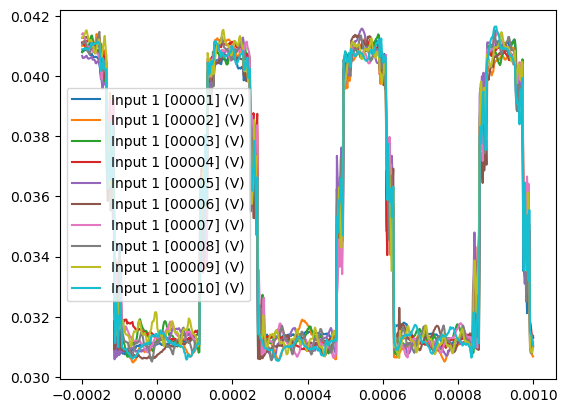

30-6-23\Flux_TDep_70mK00001.dat


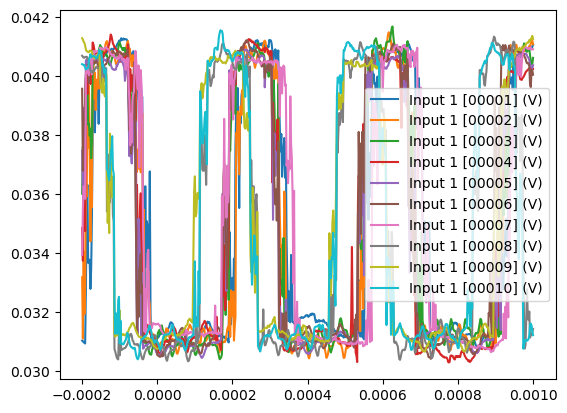

30-6-23\Flux_TDep_75mK_lobes00001.dat


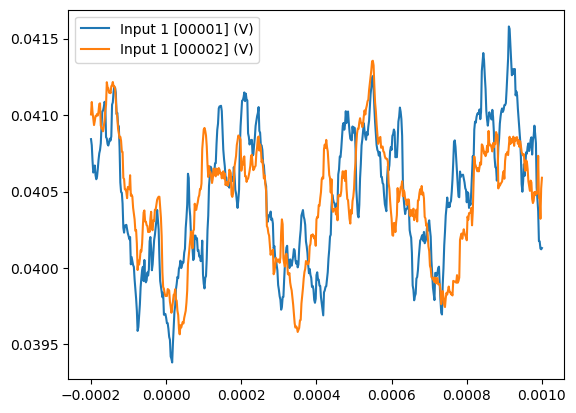

30-6-23\Flux_TDep_80mK00001.dat


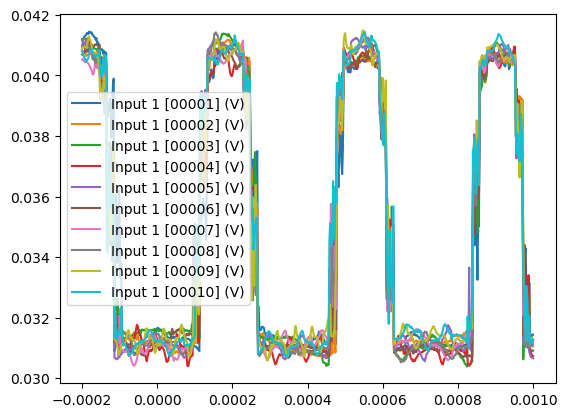

30-6-23\Flux_TDep_90mK00001.dat


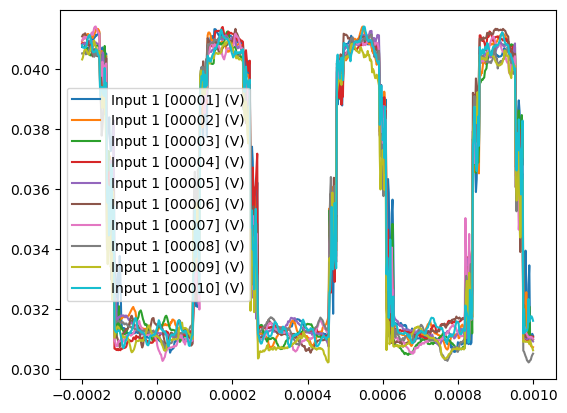

30-6-23\Flux_TDep_whilecooling_from750mK spike00001.dat


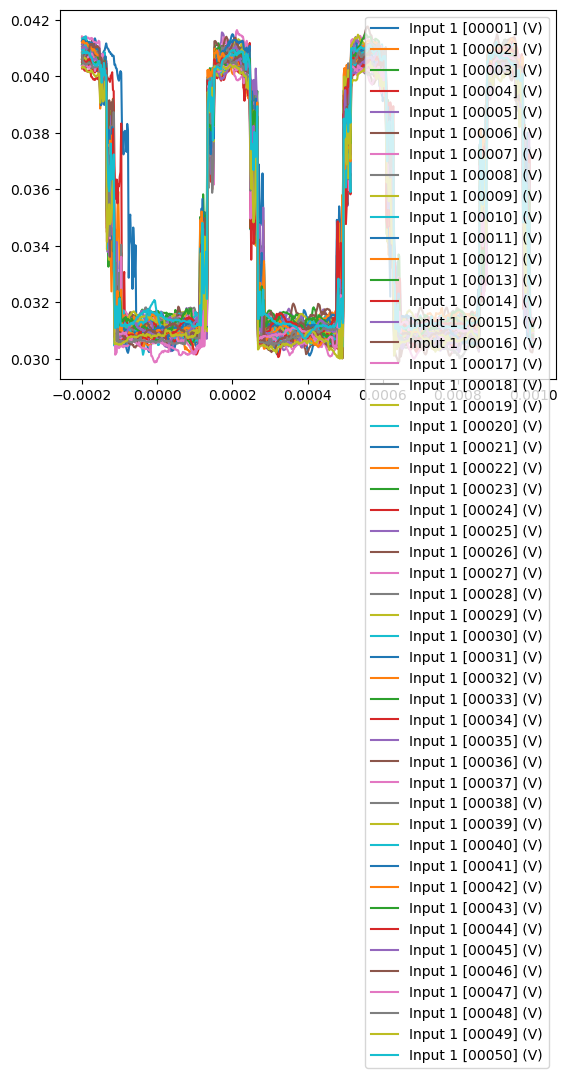

In [2]:
import re
for filename in os.listdir("30-6-23"):
    if filename.endswith(".dat") and re.findall("(Flux_TDep)", filename): 
        path = os.path.join("30-6-23", filename)
        print(path)
        df = pd.read_csv(path, skiprows=31, delimiter="\t")
        for i, col in enumerate(df.columns):
            if i != 0 and re.findall("((Input)+)", col) and not re.findall("(bwd)+", col):
                plt.plot(df[df.columns[0]], df[col], label = col)
        plt.legend()
        plt.show()
    else:
        continue

### Plotting the selected file

In [2]:
file_select = pd.read_csv("file_selection.csv", skiprows=1, delimiter="\t")
file_select


Temperature                                    Files
0            11      30-6-23\Flux_TDep_11mK_x2000001.dat
1            20      30-6-23\Flux_TDep_20mK_x2000001.dat
2            30      30-6-23\Flux_TDep_30mK_x2000001.dat
3            40      30-6-23\Flux_TDep_40mK_x2000001.dat
4            50          30-6-23\Flux_TDep_50mK00001.dat
5            60          30-6-23\Flux_TDep_60mK00001.dat
6            80          30-6-23\Flux_TDep_80mK00001.dat
7            90          30-6-23\Flux_TDep_90mK00001.dat
8           100         30-6-23\Flux_TDep_100mK00001.dat
9           110         30-6-23\Flux_TDep_110mK00001.dat
10          120         30-6-23\Flux_TDep_120mK00001.dat
11          130       30-6-23\Flux_TDep_130mK_300001.dat
12          140    30-6-23\Flux_TDep_140mK_redo00001.dat
13          150  30-6-23\Flux_TDep_150mK_repeat00001.dat
14          170         30-6-23\Flux_TDep_170mK00001.dat
15          200         30-6-23\Flux_TDep_200mK00001.dat
16          250         30-6-23\Flux_TDep_250mK00001.dat
17          300       30-6-23\Flux_TDep_300mK_200001.dat
18          350       30-6-23\Flux_TDep_350mK_200001.dat
19          400       30-6-23\Flux_TDep_400mK_200001.dat

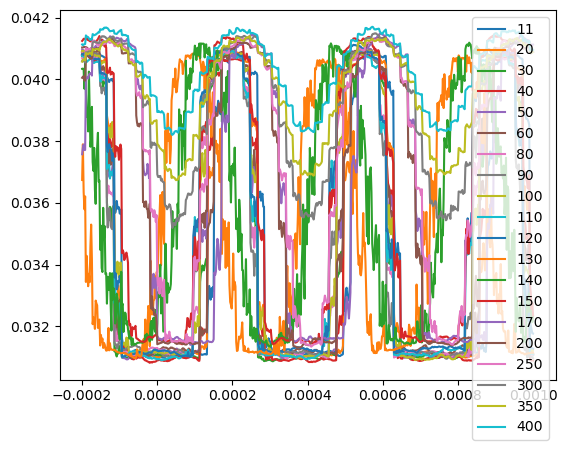

In [3]:
averaged_df_dict = {}
import re
for i, temp in enumerate(file_select["Temperature"]):
    df = pd.read_csv(file_select["Files"][i], delimiter="\t", skiprows=31)
    number_of_sweeps_fc = 0
    number_of_sweeps_lid = 0
    forward_current =[]
    LID3 = []
    for j, col in enumerate(df.columns):
        if j!= 0 and re.findall("Input", col) and not re.findall("bwd", col):
            if len(forward_current) == 0:
                forward_current = np.array(df[col].values)
            else:
                forward_current += np.array(df[col].values)
            number_of_sweeps_fc += 1
        if j!= 0 and re.findall("LI Demod", col) and not re.findall("bwd", col):
            if len(LID3) == 0:
                LID3 = np.array(df[col].values)
            else:
                LID3 += np.array(df[col].values)
            number_of_sweeps_lid += 1
    forward_current /= number_of_sweeps_fc
    LID3 /= number_of_sweeps_lid
    df_new = pd.DataFrame({"Out": df[df.columns[0]], "Current": forward_current, "LID3": LID3})
    averaged_df_dict[str(temp)] = df_new
    plt.plot(df_new["Out"], df_new["Current"], label = str(temp))
    plt.legend()
    
    #plt.show()
    

11
8484.191901408087
20
8486.483748638477
30
8638.091657487517
40
8651.908532236772
50
8499.676346760752
60
8642.351073669728
80
8651.829075227812
90
8655.571713858959
100
8667.919264814269
110
8669.637968439854
120
8676.112064262064
130
8772.046683650462
140
8842.55043977908
150
8691.343388485991
170
8691.45462924214
200
8743.308788739136
250
8714.3206709702
300
8706.420043440785
350
8706.837780699427
400
8853.134569380707


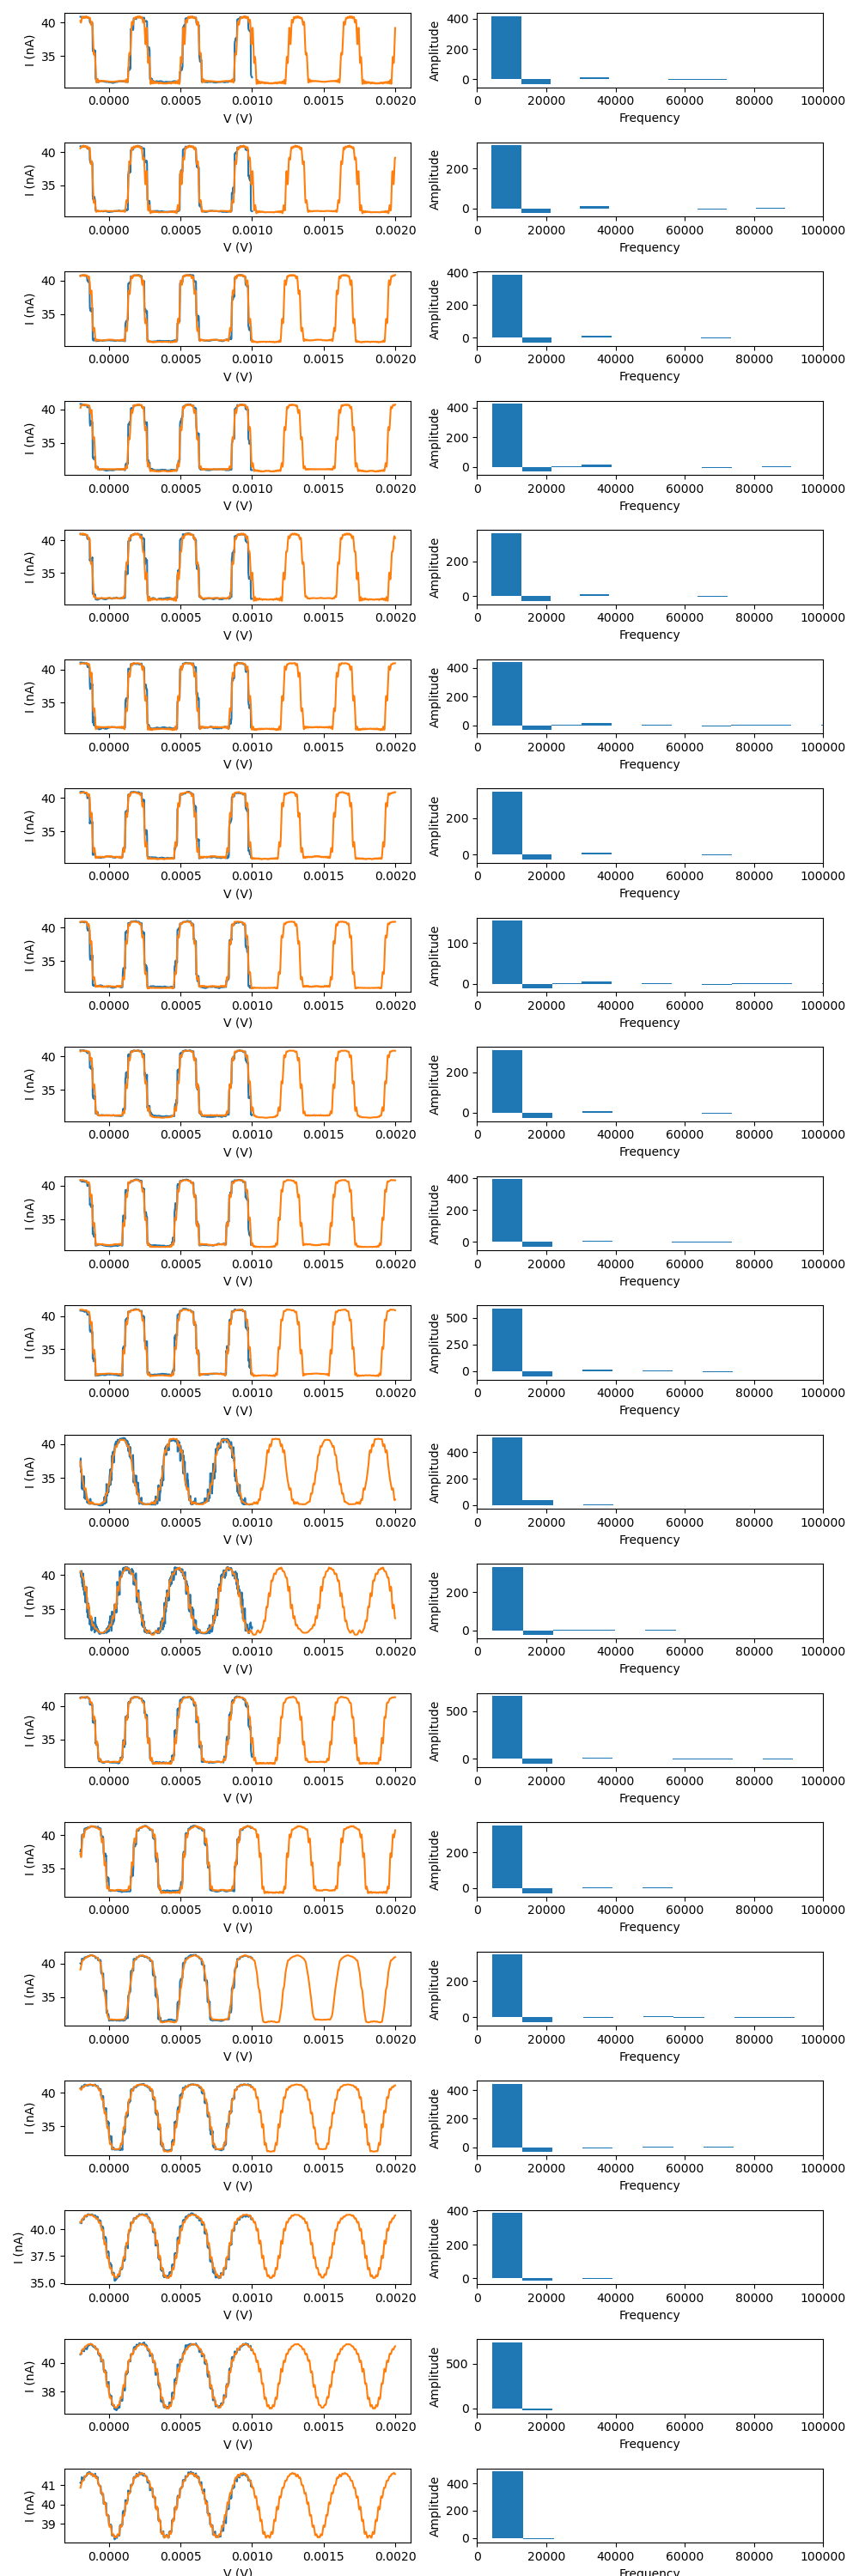

In [63]:

from scipy import interpolate
from scipy.optimize import curve_fit

def fourier(x,b, t, amp,  *a):
    ret = a[0] / 2
    for deg in range(1, len(a)):
        ret += a[deg] * np.cos((deg+1) * np.pi / t * (x+b))
    return amp * ret

fig, ax = plt.subplots(len(averaged_df_dict),2)
i=0
for key, value in averaged_df_dict.items():

    #if key == "200":
    print(key)
    fig.set_figheight(30)
    fig.set_figwidth(10)
    fig.tight_layout()

    x = value["Out"].values
    y = value["Current"].values * 1e3
    ax[i, 0].plot(x, y)
    
    #Interpolate data to increase the resolution
    """f_interp = interpolate.interp1d(x, y)
    sample_rate = 0.0000000001
    X = np.arange(np.min(x), np.max(x), sample_rate)
    Y = f_interp(X)
    ax[1,0].plot(X, Y)
    print(len(x))
    print(len(X))"""


    popt, pcov = curve_fit(fourier, x, y, [0.00001, 0.0004, 0.04]+[1.0] * 50)

    print(np.pi/popt[1])
    #print(popt)
    xn = np.linspace(np.min(x), 2*np.max(x), 100000)
    yn = fourier(xn, *popt)
    ax[i, 0].plot(xn, yn)
    ax[i, 0].set_xlabel("V (V)")
    ax[i, 0].set_ylabel("I (nA)")
    fourier_coeff = popt[3:]
    freq = np.arange(1, len(fourier_coeff)+1, 1) * (np.pi/popt[1])
    ax[i, 1].bar(freq, fourier_coeff, width=(np.pi/popt[1]))
    ax[i, 1].set_xlim(0, 100000)
    #ax[i, 1].set_ylim(-1, 5)
    ax[i, 1].set_xlabel("Frequency")
    ax[i, 1].set_ylabel("Amplitude")
    i+=1
plt.show()

In [ ]:
%matplotlib widget
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import math
import numpy as np

def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], np.min(y)), *zip(x, y), (x[-1], np.min(y))]


ax = plt.figure().add_subplot(projection='3d')

verts = []

for key, values in averaged_df_dict.items():
    x = values["Out"].values
    y = values["Current"].values
    print(np.shape(verts))
    verts.append(polygon_under_graph(x, y))

print(verts[0])
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)

ax.add_collection3d(poly, zs=list(map(int, averaged_df_dict.keys())), zdir='y')
ax.set(xlim=(-0.0002, 0.001), ylim=(0, 400), zlim=(0.03, 0.047),
       xlabel='Output', ylabel=r'Temperature', zlabel='Current')
plt.show()


In [ ]:
from scipy.signal import lfilter
from scipy.optimize import curve_fit
fig, ax = plt.subplots(len(averaged_df_dict),2)

fig.set_figheight(30)
fig.set_figwidth(10)
fig.tight_layout()
i=0

first_local_maxima = {}

def fourier(x,b, t, amp,  *a):
    ret = a[0] / 2
    for deg in range(1, len(a)):
        ret += a[deg] * np.cos((deg+1) * np.pi / t * (x+b))
    return amp * ret

max_ranges_x = [(-0.0002, 0), (0, 0.0003), (0.0003, 0.0008), (0.0008, 0.001)]

for key, value in averaged_df_dict.items():
    x = value["Out"].values
    y = value["Current"].values * 1e3
    ax[i, 0].plot(x, y)
    n = 10  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    
    #y_clean = lfilter(b, a, y)
    
    
    #ax[i, 0].plot(x, y_clean)
    

    
    if int(key) < 100:
        coeff_n = 5
    else:
        coeff_n = 3
    

    popt, pcov = curve_fit(fourier, x, y, [0.00001, 0.0004, 30]+[1.0] * coeff_n)

    print(np.pi/popt[1])
    #print(popt)
    xn = np.linspace(np.min(x), 2*np.max(x), 100000)
    yn = fourier(xn, *popt)


    dy = np.gradient(yn, np.abs(xn[1]-xn[0]))
    ax[i, 1].plot(x, value["LID3"].values/np.max(value["LID3"].values))
    ax[i, 1].plot(xn, dy/np.max(dy))


    #ax[i, 1].set_ylim(-0.02, 0.02)

    df = pd.DataFrame({
        "X":xn,
        "Y":yn
    })




    for ranges in max_ranges_x:

        

        df_temp = df[(df["X"] > ranges[0]) & (df["X"] < ranges[1])]
        local_maximum = df_temp.loc[df_temp['Y'].idxmax()]
        print(local_maximum)
        ax[i, 0].plot(df_temp["X"], df_temp["Y"])
        ax[i, 0].plot(local_maximum["X"], local_maximum["Y"], ".")

        if ranges == (0, 0.0003):
            first_local_maxima[key] = local_maximum
    
    
    ax[i, 0].set_xlabel("V (V)")
    ax[i, 0].set_ylabel("I (mA)")
    ax[i, 1].set_xlabel("V (V)")
    ax[i, 1].set_ylabel("DI/DV")
    
    i+=1

    
plt.show()

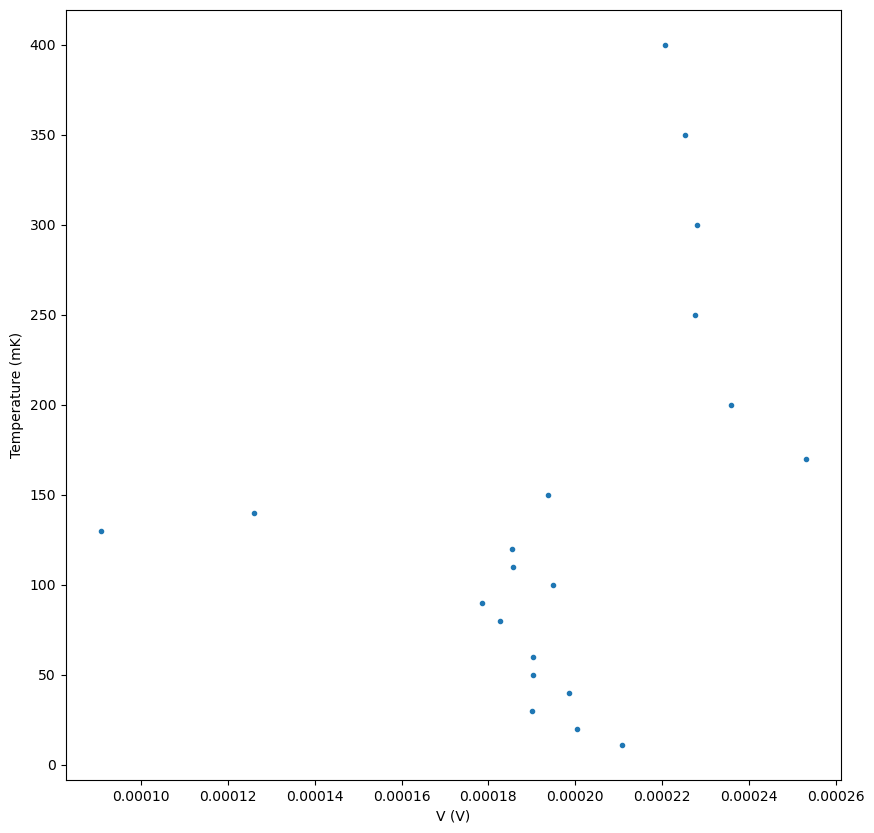

In [57]:
#print(first_local_maxima)
plt.rcParams["figure.figsize"] = (10,10)
Temp = np.array(list(first_local_maxima.keys()), dtype=int)
Voltage = []

for x, y in first_local_maxima.values():
    Voltage.append(x)

plt.plot(Voltage, Temp, ".")
plt.xlabel("V (V)")
plt.ylabel("Temperature (mK)")
plt.show()
